In [ ]:
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D, LeakyReLU
from keras.layers import Dropout, Flatten, Dense, Input, Reshape, Activation
from keras.models import Sequential, Model
from keras.optimizers import Adam
from matplotlib import pyplot
from keras.datasets.mnist import load_data
import numpy as np
from keras.models import load_model
from numpy.random import randint
from numpy.random import randn

In [ ]:
(train_data, _), (_, _) = load_data()
np.random.shuffle(train_data)
sample_data = train_data.reshape(-1,28,28,1)
sample_data = sample_data.astype('float32')
sample_data = sample_data / 255.0
sample_data.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [ ]:
latent_dim = 100
inp_x = Input(shape=(100,))
x = Dense(64*7*7)(inp_x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7,7,64))(x)
x = Conv2DTranspose(128,(4,4),strides=(2,2),padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(256,(4,4),strides=(2,2),padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2D(1,(7,7), activation='sigmoid', padding='same')(x)
gen_model  = Model(inputs=inp_x,outputs=x)
gen_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 3136)              316736    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3136)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       131200    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 256)      

In [ ]:
inp_y = Input((28,28,1))
y = Conv2D(32, (3,3),strides=(2,2),padding='same')(inp_y)
y = LeakyReLU(alpha=0.2)(y)
y = Conv2D(64, (3,3), strides=(2,2),padding='same')(y)
y = LeakyReLU(alpha=0.2)(y)
y = Conv2D(128, (3,3), strides=(2,2),padding='same')(y)
y = LeakyReLU(alpha=0.2)(y)
y = Flatten()(y)
y = Dense(1, activation='sigmoid')(y)
disc_model  = Model(inputs=inp_y,outputs=y)
disc_model.summary()
opt = Adam(lr=0.0002)
disc_model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4, 4, 128)        

In [ ]:
def create_final_model(gen_m, disc_m):
  disc_model.trainable = False
  final_model  = Sequential()
  final_model.add(gen_m)
  final_model.add(disc_m)
  final_model.summary()
  opt = Adam(lr=0.0002)
  final_model.compile(loss='binary_crossentropy',optimizer=opt)
  return final_model

In [ ]:
def plt_func(epoch, gen_model_tmp, disc_model_temp, sample_data_tmp, latent_dim, real_acc_history, fake_acc_history, n_samples=100):
  # Generating real and fake samples
  X_real = sample_data_tmp[randint(0, sample_data_tmp.shape[0], n_samples)]
  y_real = np.ones((n_samples, 1))

  x_temp = randn(latent_dim * n_samples).reshape(n_samples, latent_dim)
  X_fake = gen_model_tmp.predict(x_temp)
  y_fake = np.zeros((n_samples, 1))

  # evaluating accuracies for real and fake images
  _, real_accuracy = disc_model_temp.evaluate(X_real, y_real)
  _, fake_accuracy = disc_model_temp.evaluate(X_fake, y_fake)
  print ("Real images Accuracy: " + str(real_accuracy) +", Fake images accuracy: " + str(fake_accuracy))

  real_acc_history.append(real_accuracy)
  fake_acc_history.append(fake_accuracy)

  for i in range(16):
    pyplot.subplot(4,4,i+1)
    pyplot.axis('off')
    pyplot.imshow(X_fake[i,:,:,0], cmap='gray_r')
  pyplot.show()
 # pyplot.savefig("generated_images_%d.png"%(epoch))
 # pyplot.close()
  # g_model.save("generator_model_%d.h5"%(epoch))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 28, 28, 1)         985025    
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 94721     
Total params: 1,079,746
Trainable params: 985,025
Non-trainable params: 94,721
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step - loss: 9.5165 - accuracy: 0.0000e+00
Real images Accuracy: 0.9900000095367432, Fake images accuracy: 0.0


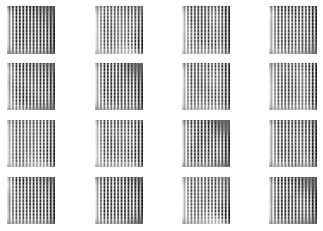

4/4 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Real images Accuracy: 1.0, Fake images accuracy: 1.0


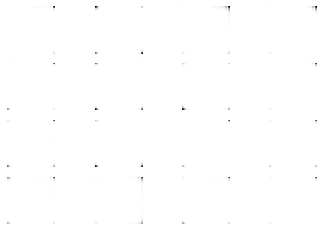

4/4 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8400
Real images Accuracy: 0.5099999904632568, Fake images accuracy: 0.8399999737739563


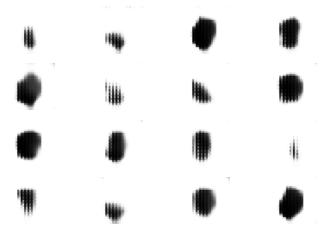

4/4 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7000
Real images Accuracy: 0.6800000071525574, Fake images accuracy: 0.699999988079071


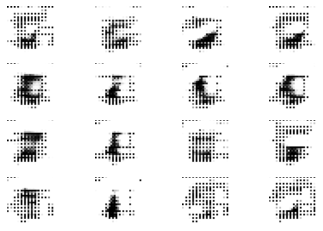

4/4 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7600
Real images Accuracy: 0.5299999713897705, Fake images accuracy: 0.7599999904632568


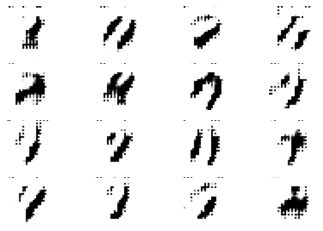

4/4 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7200
Real images Accuracy: 0.699999988079071, Fake images accuracy: 0.7200000286102295


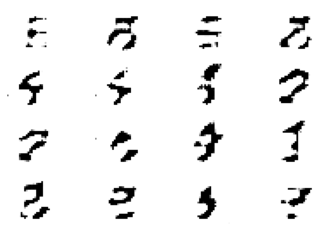

4/4 [==============================] - 0s 2ms/step - loss: 0.7733 - accuracy: 0.4600
Real images Accuracy: 0.7699999809265137, Fake images accuracy: 0.46000000834465027


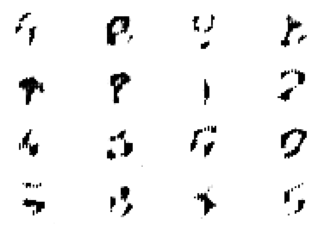

4/4 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4600
Real images Accuracy: 0.5199999809265137, Fake images accuracy: 0.46000000834465027


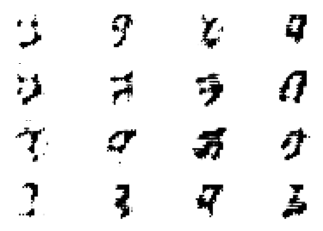

4/4 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8200
Real images Accuracy: 0.949999988079071, Fake images accuracy: 0.8199999928474426


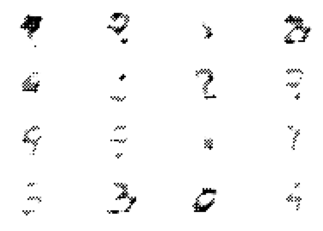

4/4 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8300
Real images Accuracy: 0.8600000143051147, Fake images accuracy: 0.8299999833106995


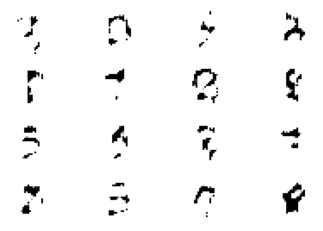

4/4 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8400
Real images Accuracy: 0.9599999785423279, Fake images accuracy: 0.8399999737739563


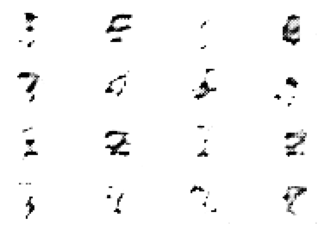

4/4 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.7200
Real images Accuracy: 0.5600000023841858, Fake images accuracy: 0.7200000286102295


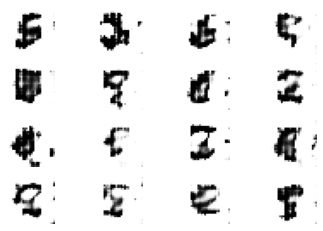

4/4 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6200
Real images Accuracy: 0.8100000023841858, Fake images accuracy: 0.6200000047683716


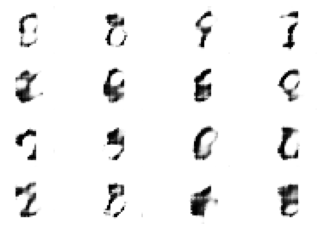

4/4 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.3900
Real images Accuracy: 0.3499999940395355, Fake images accuracy: 0.38999998569488525


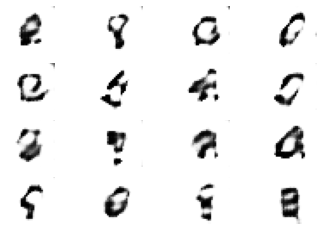

4/4 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.5200
Real images Accuracy: 0.5299999713897705, Fake images accuracy: 0.5199999809265137


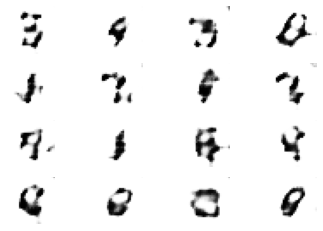

4/4 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6000
Real images Accuracy: 0.5699999928474426, Fake images accuracy: 0.6000000238418579


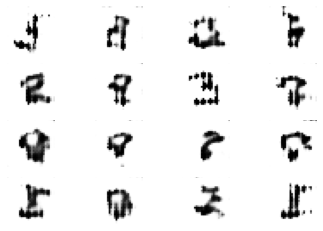

4/4 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8700
Real images Accuracy: 0.6600000262260437, Fake images accuracy: 0.8700000047683716


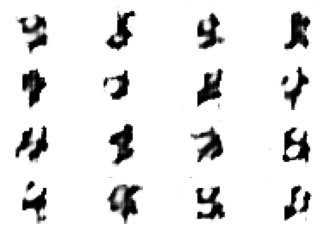

4/4 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.6900
Real images Accuracy: 0.550000011920929, Fake images accuracy: 0.6899999976158142


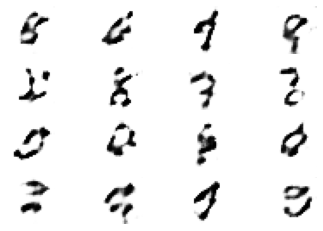

4/4 [==============================] - 0s 2ms/step - loss: 0.7515 - accuracy: 0.5000
Real images Accuracy: 0.49000000953674316, Fake images accuracy: 0.5


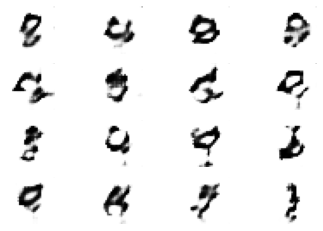

4/4 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7300
Real images Accuracy: 0.8600000143051147, Fake images accuracy: 0.7300000190734863


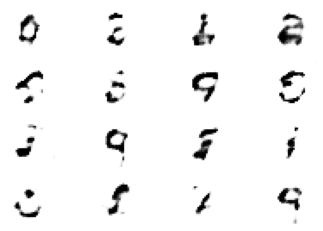

4/4 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7100
Real images Accuracy: 0.6800000071525574, Fake images accuracy: 0.7099999785423279


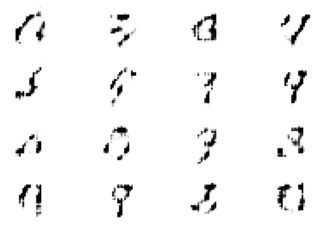

4/4 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7700
Real images Accuracy: 0.7400000095367432, Fake images accuracy: 0.7699999809265137


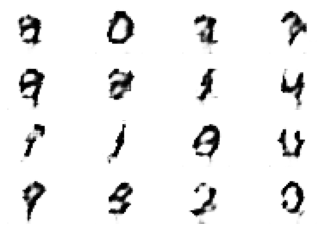

4/4 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7100
Real images Accuracy: 0.6600000262260437, Fake images accuracy: 0.7099999785423279


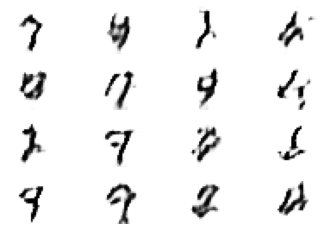

4/4 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7600
Real images Accuracy: 0.6899999976158142, Fake images accuracy: 0.7599999904632568


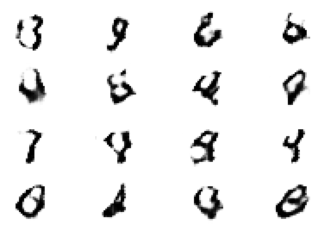

4/4 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8500
Real images Accuracy: 0.6800000071525574, Fake images accuracy: 0.8500000238418579


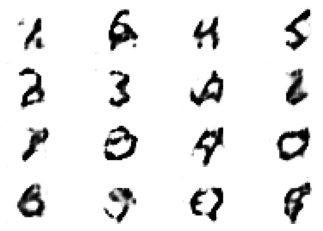

4/4 [==============================] - 0s 2ms/step - loss: 0.7602 - accuracy: 0.5200
Real images Accuracy: 0.6000000238418579, Fake images accuracy: 0.5199999809265137


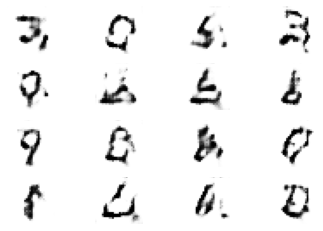

4/4 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6500
Real images Accuracy: 0.7200000286102295, Fake images accuracy: 0.6499999761581421


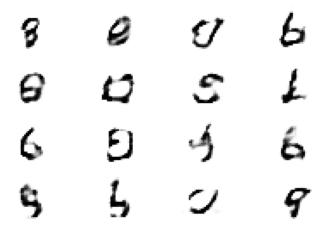

4/4 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6500
Real images Accuracy: 0.7099999785423279, Fake images accuracy: 0.6499999761581421


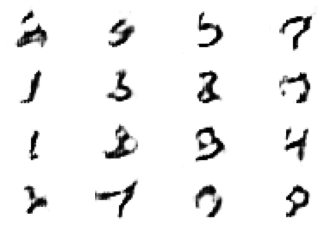

4/4 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6000
Real images Accuracy: 0.7300000190734863, Fake images accuracy: 0.6000000238418579


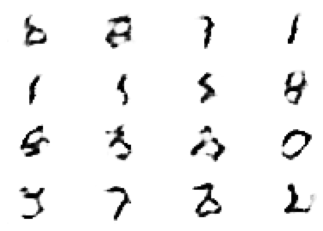

4/4 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5600
Real images Accuracy: 0.6899999976158142, Fake images accuracy: 0.5600000023841858


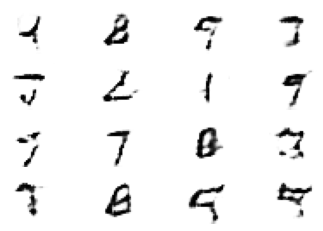

4/4 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6100
Real images Accuracy: 0.46000000834465027, Fake images accuracy: 0.6100000143051147


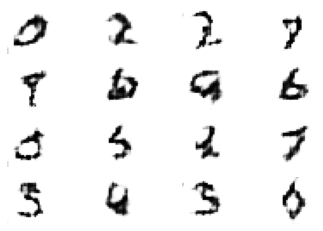

4/4 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6400
Real images Accuracy: 0.6600000262260437, Fake images accuracy: 0.6399999856948853


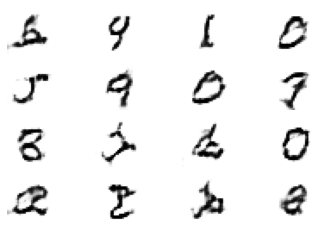

4/4 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7400
Real images Accuracy: 0.6299999952316284, Fake images accuracy: 0.7400000095367432


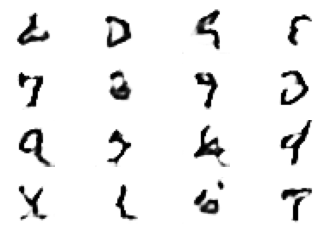

4/4 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6800
Real images Accuracy: 0.6499999761581421, Fake images accuracy: 0.6800000071525574


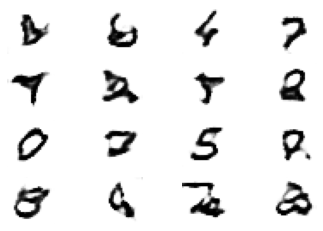

4/4 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7200
Real images Accuracy: 0.5400000214576721, Fake images accuracy: 0.7200000286102295


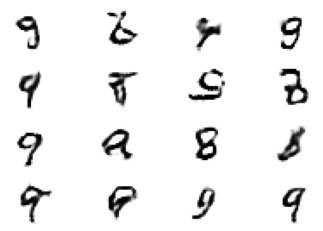

4/4 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5600
Real images Accuracy: 0.5799999833106995, Fake images accuracy: 0.5600000023841858


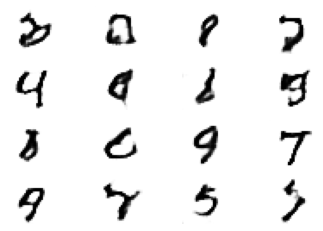

4/4 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5600
Real images Accuracy: 0.6200000047683716, Fake images accuracy: 0.5600000023841858


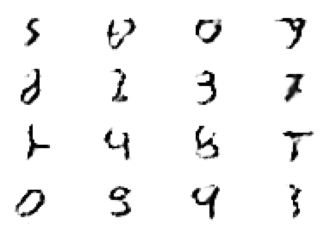

4/4 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7000
Real images Accuracy: 0.7799999713897705, Fake images accuracy: 0.699999988079071


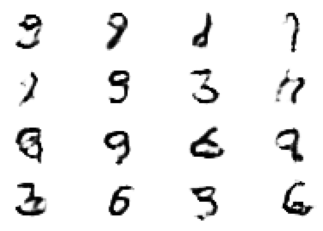

4/4 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6300
Real images Accuracy: 0.6399999856948853, Fake images accuracy: 0.6299999952316284


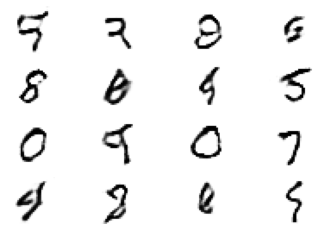

4/4 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6200
Real images Accuracy: 0.6299999952316284, Fake images accuracy: 0.6200000047683716


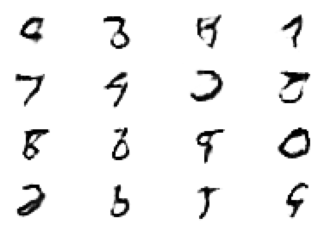

4/4 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6700
Real images Accuracy: 0.6299999952316284, Fake images accuracy: 0.6700000166893005


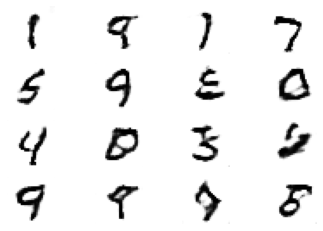

4/4 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.5900
Real images Accuracy: 0.699999988079071, Fake images accuracy: 0.5899999737739563


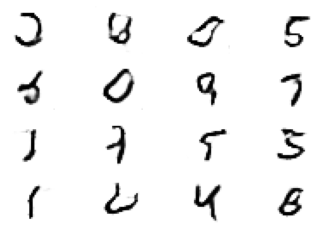

4/4 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6000
Real images Accuracy: 0.6800000071525574, Fake images accuracy: 0.6000000238418579


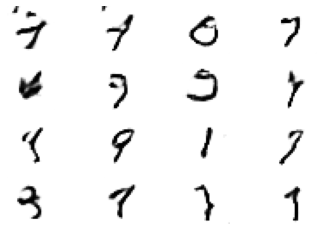

4/4 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6900
Real images Accuracy: 0.41999998688697815, Fake images accuracy: 0.6899999976158142


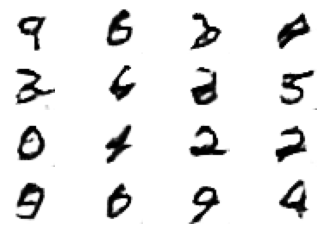

4/4 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.8500
Real images Accuracy: 0.3799999952316284, Fake images accuracy: 0.8500000238418579


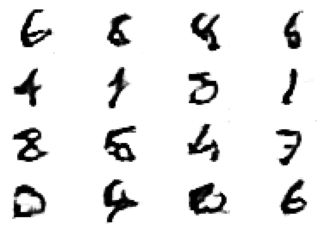

4/4 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6100
Real images Accuracy: 0.6700000166893005, Fake images accuracy: 0.6100000143051147


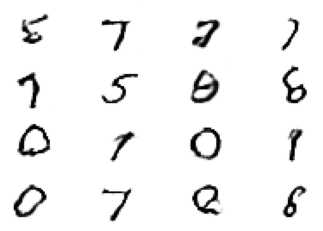

4/4 [==============================] - 0s 2ms/step - loss: 0.7446 - accuracy: 0.4500
Real images Accuracy: 0.7699999809265137, Fake images accuracy: 0.44999998807907104


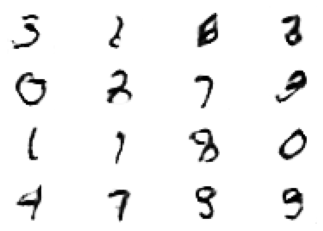

4/4 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5700
Real images Accuracy: 0.49000000953674316, Fake images accuracy: 0.5699999928474426


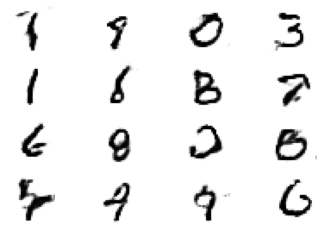

4/4 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.6600
Real images Accuracy: 0.699999988079071, Fake images accuracy: 0.6600000262260437


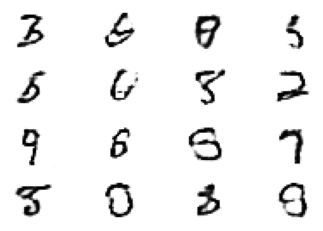

4/4 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6000
Real images Accuracy: 0.6299999952316284, Fake images accuracy: 0.6000000238418579


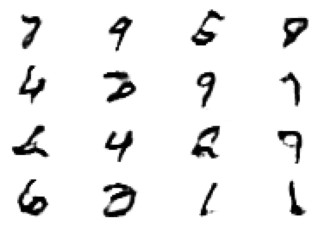

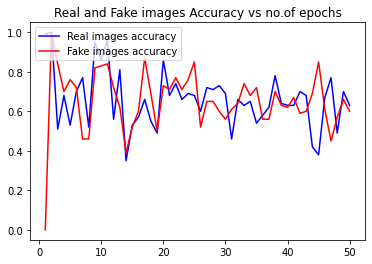

In [ ]:
n_epochs = 50
batch_size = 256
half_batch = int(batch_size / 2)
n_iterations = int(sample_data.shape[0] / batch_size)

real_final_model = create_final_model(gen_model, disc_model)
real_acc_history, fake_acc_history = [], []
for i in range(n_epochs): 
  np.random.shuffle(sample_data)
  # enumerate batches over the training set
  for j in range(n_iterations): 
    X_real = sample_data[j*half_batch:j*half_batch + half_batch]
    
    x_temp = np.random.randn(latent_dim * half_batch).reshape(half_batch, latent_dim)
    X_fake = gen_model.predict(x_temp)

    X = np.concatenate((X_real,X_fake))
    y = np.concatenate((np.ones((half_batch)),np.zeros((half_batch))))
    disc_loss, _ = disc_model.train_on_batch(X, y)

    X_gan = np.random.randn(latent_dim * batch_size).reshape(batch_size, latent_dim)
    y_gan = np.ones((batch_size, 1))
		# update the generator via the discriminator's error
    gan_loss = real_final_model.train_on_batch(X_gan, y_gan)
    
  plt_func(i, gen_model, disc_model, sample_data, latent_dim, real_acc_history, fake_acc_history)
    
pyplot.plot(range(1,n_epochs+1), real_acc_history, "-b", label="Real images accuracy")
pyplot.plot(range(1,n_epochs+1), fake_acc_history, "-r", label="Fake images accuracy")
pyplot.legend(loc="upper left")
pyplot.title("Real and Fake images Accuracy vs no.of epochs")
pyplot.show()
